Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 257.4756
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 131.6084
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 15.3042
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 9.5897
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 9.4530
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 9.4170
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 9.3796
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 9.3370
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 9.2888
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 9.2351


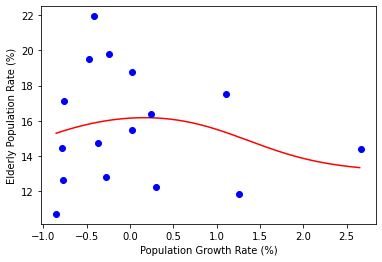

In [1]:
# 딥러닝 네트워크의 회귀선
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 6, activation = 'tanh', input_shape = (1, )),
                             tf.keras.layers.Dense(units = 1)
])

model.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.1), loss = 'mse')

model.fit(X, Y, epochs = 10)

#model.predict(X)

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

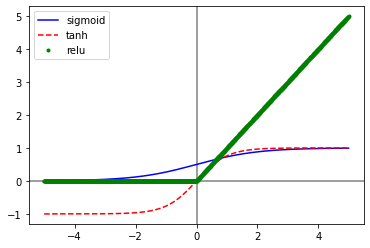

Epoch 1/25
10/10 [==============================] - 0s 11ms/step - loss: 2.9803 - val_loss: 0.9511
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 0.4764 - val_loss: 0.3649
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2907 - val_loss: 0.4504
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2683 - val_loss: 0.3643
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2486 - val_loss: 0.2926
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1871 - val_loss: 0.2963
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1669 - val_loss: 0.3084
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1668 - val_loss: 0.3185
Epoch 9/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1517 - val_loss: 0.2274
Epoch 10/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1389 - val_loss: 0.1999
Epoch 11/25
10/10 

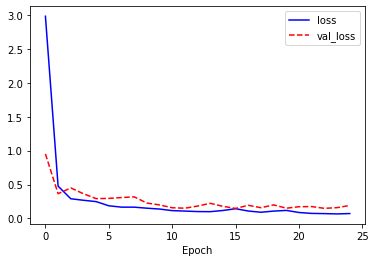

4/4 [==============================] - 0s 2ms/step - loss: 0.2137


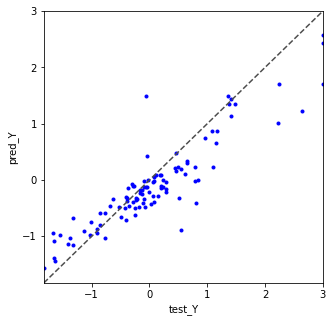

In [17]:
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

x_mean = train_X.mean(axis = 0)
x_std = train_X.std(axis = 0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis = 0)
y_std = train_Y.std(axis = 0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 52, activation = 'relu', input_shape = (13, )),
                             tf.keras.layers.Dense(units = 39, activation = 'relu'),
                             tf.keras.layers.Dense(units = 26, activation = 'relu'),
                             tf.keras.layers.Dense(units = 1)
])

model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.07), loss = 'mse')

# model.summary()

import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

history = model.fit(train_X, train_Y, epochs = 25, batch_size = 32, validation_split = 0.25)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()



model.evaluate(test_X, test_Y)



pred_Y = model.predict(test_X)

plt.figure(figsize = (5, 5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls = "--", c = ".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

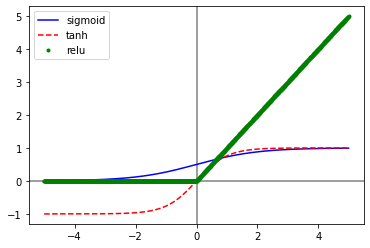

Epoch 1/25
10/10 [==============================] - 0s 13ms/step - loss: 1.8602 - val_loss: 1.1455
Epoch 2/25
10/10 [==============================] - 0s 4ms/step - loss: 0.6012 - val_loss: 0.7595
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.3574 - val_loss: 0.8211
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.4512 - val_loss: 0.4693
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.3318 - val_loss: 0.4464
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2928 - val_loss: 0.3305
Epoch 7/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2203 - val_loss: 0.2928
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1862 - val_loss: 0.3281
Epoch 9/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1771 - val_loss: 0.2847
Epoch 10/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1608 - val_loss: 0.2710
Epoch 11/25
10/10 

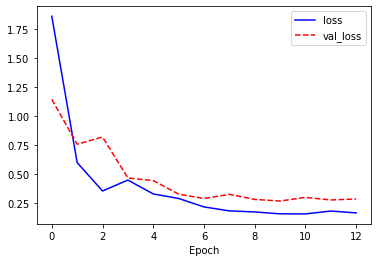

4/4 [==============================] - 0s 2ms/step - loss: 0.1707


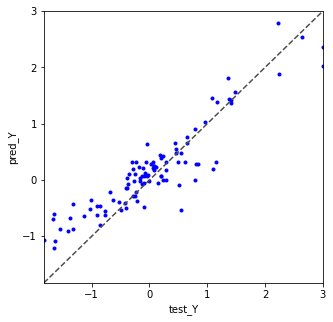

In [18]:
# callback 이용


from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

x_mean = train_X.mean(axis = 0)
x_std = train_X.std(axis = 0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis = 0)
y_std = train_Y.std(axis = 0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 52, activation = 'relu', input_shape = (13, )),
                             tf.keras.layers.Dense(units = 39, activation = 'relu'),
                             tf.keras.layers.Dense(units = 26, activation = 'relu'),
                             tf.keras.layers.Dense(units = 1)
])

model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.07), loss = 'mse')

# model.summary()

import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

history = model.fit(train_X, train_Y, epochs = 25, batch_size = 32, validation_split = 0.25, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3, monitor = 'val_loss')])
########


import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()



model.evaluate(test_X, test_Y)



pred_Y = model.predict(test_X)

plt.figure(figsize = (5, 5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls = "--", c = ".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()